In [36]:
import pickle, random
from sklearn.neighbors import KernelDensity
import numpy as np
from scipy.stats import norm
dataset = pickle.load(open("dataset_mixed.p", "rb"))
random.shuffle([el[0] for el in dataset])

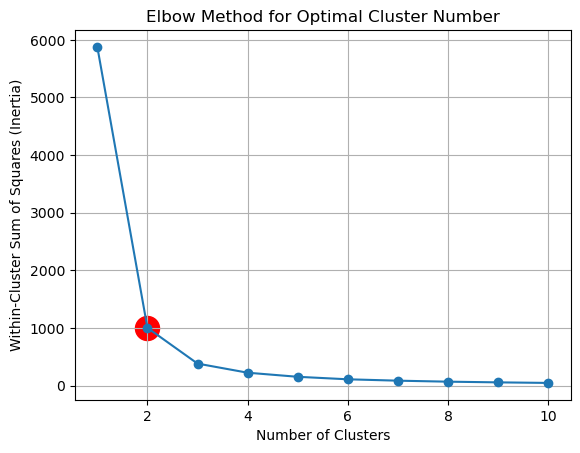

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing

# Assuming 'data' is your list of normalized floating-point numbers
data = np.array(dataset).reshape(-1, 1)  # Reshape to a 2D array

# Choose a range of cluster numbers to test
cluster_range = range(1, 11)
inertia_values = []

# Run k-means for each cluster number and store the inertia
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    inertia_values.append(kmeans.inertia_)
# Identify the elbow point based on a threshold
elbow = np.argmin(np.diff(inertia_values)) + 1
# Plot the elbow curve
plt.plot(cluster_range, inertia_values, marker='o')
# Add a line marking the elbow point
#plt.axvline(x=cluster_range[elbow], color='r', linestyle='--', label='Elbow')
elbow_index = 1  # Replace with the visually identified elbow index (adjust as needed)
plt.scatter(cluster_range[elbow_index], inertia_values[elbow_index], s=300, marker='o', c='red', label='Elbow')

plt.title('Elbow Method for Optimal Cluster Number')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.grid(True)
plt.savefig("elbow_test.png", dpi=600)
plt.show()


In [47]:
new_data = pickle.load(open("datasets_clusters.p", "rb"))
data = np.array(new_data)

/home/astar/anaconda3/envs/medaka/lib/python3.8/site-packages/KDEpy/bw_selection.py:262: UserWarning: Silverman's rule currently ignores all weights
  warnings.warn("Silverman's rule currently ignores all weights")


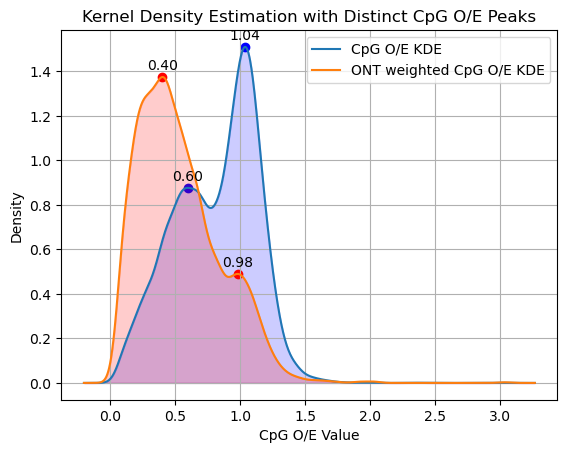

In [48]:
from KDEpy import FFTKDE
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Assuming `new_data` is a list of tuples where each tuple is (age, income)
customer_ages = [el[0] for el in new_data]
customer_income = [el[1] for el in new_data]

# Plot Distribution of Customer Ages
kde_ages = FFTKDE(kernel="gaussian", bw="silverman").fit(customer_ages)
x_ages, y_ages = kde_ages.evaluate()
peaks_ages, _ = find_peaks(y_ages, height=0.02)  # Adjust the height threshold as needed
plt.plot(x_ages, y_ages, label="CpG O/E KDE")
plt.fill_between(x_ages, y_ages, color='blue', alpha=0.2)
plt.scatter(x_ages[peaks_ages], y_ages[peaks_ages], marker='o', color='blue')
for peak in peaks_ages:
    plt.annotate(f'{x_ages[peak]:.2f}', (x_ages[peak], y_ages[peak]), textcoords="offset points", xytext=(0, 5), ha='center')

# Plot Distribution of Customer Income Weighted by Income
kde_income = FFTKDE(bw="silverman").fit(customer_ages, weights=customer_income)
x_income, y_income = kde_income.evaluate()
peaks_income, _ = find_peaks(y_income, height=0.02)  # Adjust the height threshold as needed
plt.plot(x_income, y_income, label="ONT weighted CpG O/E KDE")
plt.fill_between(x_income, y_income, color='red', alpha=0.2)
plt.scatter(x_income[peaks_income], y_income[peaks_income], marker='o', color='red')
for peak in peaks_income:
    plt.annotate(f'{x_income[peak]:.2f}', (x_income[peak], y_income[peak]), textcoords="offset points", xytext=(0, 5), ha='center')
desired_positions = [0.65, 1.04]  # Adjust as needed
tags = ["unmethylated", "methylated"]
colors = ["orange", "blue"]
#for p, position in enumerate(desired_positions):
#    plt.axvline(x=position, color=colors[p], linestyle='--', linewidth=1, label=tags[p])
# Add red circle at a specified peak (for example, the first peak in this case)
specified_peak = peaks_income[0]
#plt.scatter(x_income[specified_peak], y_income[specified_peak], color='blue', marker='X', s=100, label='Peak')
# Set up legend
plt.legend()

# Show the plot
plt.xlabel('CpG O/E Value')
plt.ylabel('Density')
plt.title('Kernel Density Estimation with Distinct CpG O/E Peaks')
plt.grid(True)
plt.savefig("KDE_test.png", dpi=600)
plt.show()


In [5]:
from diptest import diptest

# Assuming 'data' is your list of floats
dip_test_statistic, dip_test_p_value = diptest(np.array(dataset))

In [6]:
dip_test_statistic

0.0020735977151131735

In [7]:
dip_test_p_value

0.9928106264912083

In [8]:
dataset = pickle.load(open("dataset_sample.p", "rb"))
sn.histplot(dataset["sample_108"], kde=True)

NameError: name 'sn' is not defined

In [9]:
data_8 = pickle.load(open("gene_CpG_test_8.p", "rb"))
acc2desc = pickle.load(open("test_genes_desc_8.p", "rb"))
print (data_8[0])

(3, 219, 'Ceratonova_shasta', 'A0A4Y2ENR8', 0.7019230769230769)


In [10]:
added_CpG = [el[4] for el in data_8 if el[4]]
random.shuffle(added_CpG)

/home/astar/anaconda3/envs/medaka/lib/python3.8/site-packages/KDEpy/bw_selection.py:262: UserWarning: Silverman's rule currently ignores all weights
  warnings.warn("Silverman's rule currently ignores all weights")


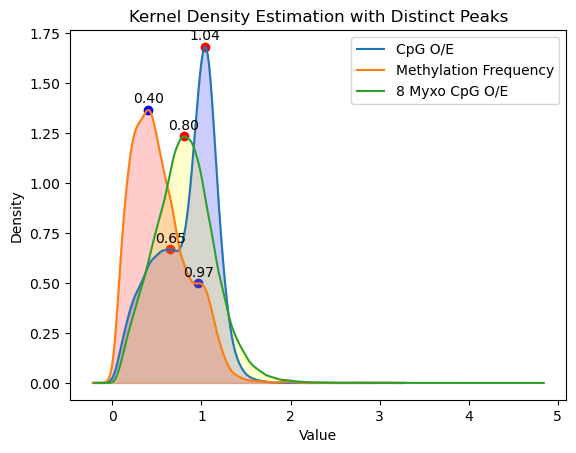

In [11]:
# Assuming `new_data` is a list of tuples where each tuple is (age, income)
customer_ages = [el[0] for el in new_data]
customer_income = [el[1] for el in new_data]
# Plot Distribution of Customer Ages
kde_ages = FFTKDE(kernel="gaussian", bw="silverman").fit(customer_ages)
x_ages, y_ages = kde_ages.evaluate()
peaks_ages, _ = find_peaks(y_ages, height=0.02)  # Adjust the height threshold as needed
plt.plot(x_ages, y_ages, label="CpG O/E")
plt.fill_between(x_ages, y_ages, color='blue', alpha=0.2)
plt.scatter(x_ages[peaks_ages], y_ages[peaks_ages], marker='o', color='red')
for peak in peaks_ages:
    plt.annotate(f'{x_ages[peak]:.2f}', (x_ages[peak], y_ages[peak]), textcoords="offset points", xytext=(0, 5), ha='center')

# Plot Distribution of Customer Income Weighted by Income
kde_income = FFTKDE(bw="silverman").fit(customer_ages, weights=customer_income)
x_income, y_income = kde_income.evaluate()
peaks_income, _ = find_peaks(y_income, height=0.02)  # Adjust the height threshold as needed
plt.plot(x_income, y_income, label="Methylation Frequency")
plt.fill_between(x_income, y_income, color='red', alpha=0.2)
plt.scatter(x_income[peaks_income], y_income[peaks_income], marker='o', color='blue')
###########8 myxo
kde_added = FFTKDE(kernel="gaussian", bw="silverman").fit(added_CpG)
x_added, y_added = kde_added.evaluate()
peaks_added, _ = find_peaks(y_added, height=0.02)  # Adjust the height threshold as needed
plt.plot(x_added, y_added, label="8 Myxo CpG O/E")
plt.fill_between(x_added, y_added, color='yellow', alpha=0.2)
plt.scatter(x_added[peaks_added], y_added[peaks_added], marker='o', color='red')
for peak in peaks_added:
    plt.annotate(f'{x_added[peak]:.2f}', (x_added[peak], y_added[peak]), textcoords="offset points", xytext=(0, 5), ha='center')
#############8 myxo
for peak in peaks_income:
    plt.annotate(f'{x_income[peak]:.2f}', (x_income[peak], y_income[peak]), textcoords="offset points", xytext=(0, 5), ha='center')
# Set up legend
plt.legend()

# Show the plot
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Kernel Density Estimation with Distinct Peaks')
plt.show()

/home/astar/anaconda3/envs/medaka/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/astar/anaconda3/envs/medaka/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/astar/anaconda3/envs/medaka/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/astar/anaconda3/envs/medaka/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The defa

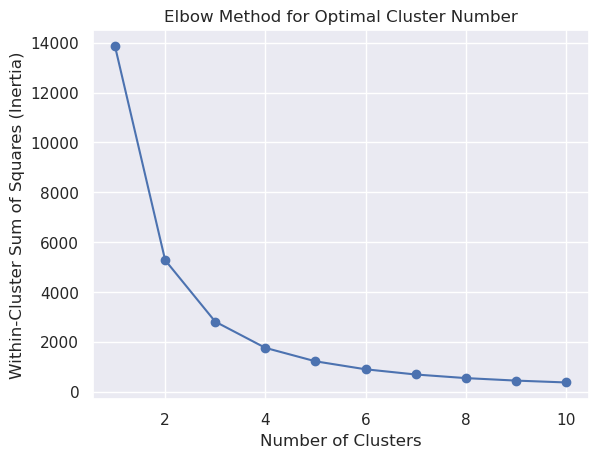

In [184]:
# Assuming 'data' is your list of normalized floating-point numbers
data = np.array(added_CpG).reshape(-1, 1)  # Reshape to a 2D array

# Choose a range of cluster numbers to test
cluster_range = range(1, 11)
inertia_values = []

# Run k-means for each cluster number and store the inertia
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(cluster_range, inertia_values, marker='o')
plt.title('Elbow Method for Optimal Cluster Number')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.show()

In [12]:
results = {"methylated":[], "unmethylated":[]}

In [13]:
from collections import defaultdict
valid_data = [el for el in data_8 if el[4]]
methylated = [(el[2], el[3]) for el in valid_data if el[4] < 0.4]
unmethylated = [(el[2], el[3]) for el in valid_data if el[4] > 0.97]
print (len(unmethylated)/len(methylated))
sample_data = {"methylated": defaultdict(set), "unmethylated": defaultdict(set)}
tags = ["methylated", "unmethylated"]
for pos, samp in enumerate([methylated, unmethylated]):
    for el in samp:
        sample_data[tags[pos]][el[0]].add(el[1])


2.7250343978564704


In [14]:
sample_data["methylated"].keys()

dict_keys(['Ceratonova_shasta', 'Henneguya_salminicola', 'Thelohanellus_kitauei', 'Enteromyxium_leei', 'Myxobolus_squamalis', 'Sphaeromyxa_zaharoni', 'Myxobolus_honghuensis', 'Kudoa_iwatai'])

In [15]:
acc2desc = pickle.load(open("test_genes_desc_8.p", "rb"))
counts = {"methylated":defaultdict(int), "unmethylated":defaultdict(int)}
from keybert import KeyBERT
kw_model = KeyBERT()
for tag in sample_data.keys():
    for sample in sample_data[tag]:
        anno = []
        for acc in sample_data[tag][sample]:
            if acc2desc.get(acc, None):
                anno += list(set([x[1] for x in acc2desc[acc]]))
                for el in [x[1] for x in acc2desc[acc]]:
                    counts[tag][el] += 1
        text = " ".join(anno)
        keywords = kw_model.extract_keywords(text, top_n=200)
        results[tag].append(set([el[0] for el in keywords]))


In [16]:
shared_unmet = set.intersection(*results["unmethylated"])


In [17]:
shared_met = set.intersection(*results["methylated"])

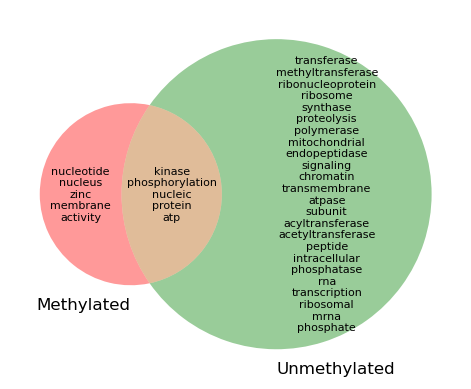

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'centers', 'get_circle_center', 'get_circle_radius', 'get_label_by_id', 'get_patch_by_id', 'hide_zeroes', 'id2idx', 'patches', 'radii', 'set_labels', 'subset_labels']


In [35]:
from matplotlib_venn import venn2

set1 = shared_met
set2 = shared_unmet

venn_diagram = venn2([set1, set2], set_labels=('Methylated', 'Unmethylated'))
# Access the venn diagram labels and update them with the actual keywords
venn_diagram.get_label_by_id('10').set_text('\n'.join(set1 - set2))  # Only in Set 1
venn_diagram.get_label_by_id('10').set_fontsize(8)
venn_diagram.get_label_by_id('01').set_text('\n'.join(set2 - set1))  # Only in Set 2
venn_diagram.get_label_by_id('01').set_fontsize(8)
venn_diagram.get_label_by_id('11').set_text('\n'.join(set1.intersection(set2)))  # In both sets
venn_diagram.get_label_by_id('11').set_fontsize(8)
plt.show()
print (dir(venn_diagram))

In [313]:
data2 = pickle.load(open("gene_CpG_test.p", "rb"))
sample_70 = [(el[5], el[4]) for el in data2 if el[4] and el[5] and el[2] not in ["sample_57", "sample_58"]]
print (len(sample_70))
print (sample_70[0:10])

9730
[(0.9542410714285714, 1.0), (0.6602406247801309, 0.125), (0.6380838323353294, 0.083), (0.6941489361702128, 0.059), (0.657109190887667, 0.143), (0.316781898177247, 0.2), (0.8387096774193549, 0.059), (0.36152219873150104, 0.077), (0.7016491754122939, 0.077), (0.4138392857142857, 0.053)]


/home/astar/anaconda3/envs/medaka/lib/python3.8/site-packages/KDEpy/bw_selection.py:262: UserWarning: Silverman's rule currently ignores all weights
  warnings.warn("Silverman's rule currently ignores all weights")


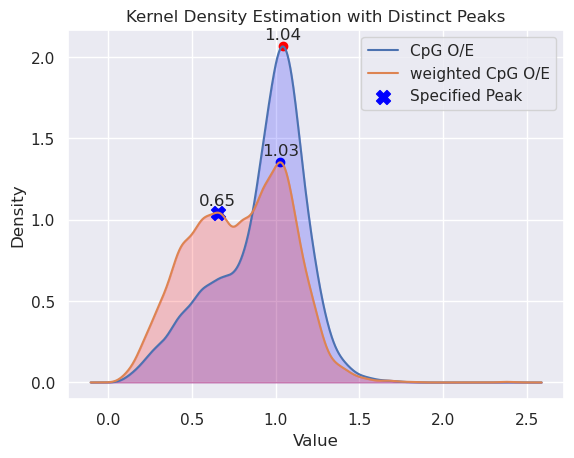

In [242]:
# Assuming `new_data` is a list of tuples where each tuple is (age, income)
CpG = [el[0] for el in sample_70]
meth = [el[1] for el in sample_70]
# Plot Distribution of Customer Ages
kde_cpg = FFTKDE(kernel="gaussian", bw="silverman").fit(CpG)
x_cpg, y_cpg = kde_cpg.evaluate()
peaks_cpg, _ = find_peaks(y_cpg, height=0.02)  # Adjust the height threshold as needed
plt.plot(x_cpg, y_cpg, label="CpG O/E")
plt.fill_between(x_cpg, y_cpg, color='blue', alpha=0.2)
plt.scatter(x_cpg[peaks_cpg], y_cpg[peaks_cpg], marker='o', color='red')
for peak in peaks_cpg:
    plt.annotate(f'{x_cpg[peak]:.2f}', (x_cpg[peak], y_cpg[peak]), textcoords="offset points", xytext=(0, 5), ha='center')

# Plot Distribution of Customer Income Weighted by Income
kde_meth = FFTKDE(bw="silverman").fit(CpG, weights=meth)
x_meth, y_meth = kde_meth.evaluate()
peaks_meth, _ = find_peaks(y_meth, height=0.02)  # Adjust the height threshold as needed
plt.plot(x_meth, y_meth, label="weighted CpG O/E")
plt.fill_between(x_meth, y_meth, color='red', alpha=0.2)
plt.scatter(x_meth[peaks_meth], y_meth[peaks_meth], marker='o', color='blue')
for peak in peaks_meth:
    plt.annotate(f'{x_meth[peak]:.2f}', (x_meth[peak], y_meth[peak]), textcoords="offset points", xytext=(0, 5), ha='center')
desired_positions = [0.65, 1.04]  # Adjust as needed
specified_peak = peaks_meth[0]
plt.scatter(x_meth[specified_peak], y_meth[specified_peak], color='blue', marker='X', s=100, label='Specified Peak')
# Set up legend
plt.legend()

# Show the plot
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Kernel Density Estimation with Distinct Peaks')
plt.show()